In [2]:
import pandas as pd

customers = pd.read_csv(r'C:\Users\raj\finalproj1\new_archive (1)\olist_customers_dataset.csv')
orders = pd.read_csv(r'C:\Users\raj\finalproj1\new_archive (1)\olist_orders_dataset.csv')
products = pd.read_csv(r'C:\Users\raj\finalproj1\new_archive (1)\olist_products_dataset.csv')  
reviews = pd.read_csv(r'C:\Users\raj\finalproj1\new_archive (1)\olist_order_reviews_dataset.csv')
order_items = pd.read_csv(r'C:\Users\raj\finalproj1\new_archive (1)\olist_order_items_dataset.csv')
payments= pd.read_csv(r'C:\Users\raj\finalproj1\new_archive (1)\olist_order_payments_dataset.csv')
sellers = pd.read_csv(r'C:\Users\raj\finalproj1\new_archive (1)\olist_sellers_dataset.csv')
geolocations = pd.read_csv(r'C:\Users\raj\finalproj1\new_archive (1)\olist_geolocation_dataset.csv')
category_name_translation = pd.read_csv(r'C:\Users\raj\finalproj1\new_archive (1)\product_category_name_translation.csv')

In [9]:
customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Check data types
customers.dtypes


customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
# Check for missing values
customers.isnull().sum()


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
# Check for duplicate entries in 'customer_unique_id'
customers['customer_unique_id'].duplicated().sum()

np.int64(3345)

In [ ]:
# Remove duplicates based on 'customer_unique_id'
customers=customers.drop_duplicates(subset='customer_unique_id', keep='first')
customers['customer_unique_id'].duplicated().sum()

np.int64(0)

In [ ]:
# Display the first few rows of the orders DataFrame
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Check data types
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
# covert date columns to datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')




In [ ]:
# Check for missing values in the 'order_purchase_timestamp' column
orders[orders['order_purchase_timestamp'].isna()]
orders.dtypes




order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [ ]:
# Check for missing values in the entire DataFrame
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:

products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Check data types
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [ ]:
# Check for missing values 
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
# Check for duplicate entries in 'product_id'
products['product_id'].duplicated().sum()

np.int64(0)

In [ ]:
# filling missing values in products dataset with 'n/a'
products.fillna('n/a', inplace=True)

C:\Users\raj\AppData\Local\Temp\ipykernel_7208\674251409.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'n/a' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products.fillna('n/a', inplace=True)


In [37]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# Check data types
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [ ]:
# change data types of 'review_creation_date' and 'review_answer_timestamp' to datetime
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'], errors='coerce')
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'], errors='coerce')

In [ ]:
# Check for missing values in the 'review_creation_date' and 'review_answer_timestamp' columns
reviews[reviews['review_creation_date'].isna()]
reviews[reviews['review_answer_timestamp'].isna()]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [ ]:
# Check for missing values in the entire DataFrame
reviews['order_id'].duplicated().sum()
reviews= reviews.drop_duplicates(subset='order_id', keep='first')


In [ ]:
# Check for duplicate entries in 'review_id'
reviews['review_id'].duplicated().sum()
reviews = reviews.drop_duplicates(subset='review_id', keep='first')

In [ ]:
# Check for missing values in the entire DataFrame
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       86647
review_comment_message     57576
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
# Fill missing values in 'review_comment_message' and 'review_comment_title' columns
reviews['review_comment_message'].fillna('no comments', inplace=True)
reviews['review_comment_title'].fillna('no title', inplace=True)


C:\Users\raj\AppData\Local\Temp\ipykernel_7208\2558321106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews['review_comment_message'].fillna('no comments', inplace=True)
C:\Users\raj\AppData\Local\Temp\ipykernel_7208\2558321106.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [ ]:
# Check for missing values in the entire DataFrame again
reviews.isnull().sum()
reviews.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [54]:
order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [56]:
order_items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [58]:
order_items['order_id'].duplicated().sum()

np.int64(13984)

In [59]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [61]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors='coerce')
order_items['shipping_limit_date'].isna().sum()

np.int64(0)

In [63]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [64]:
order_items.rename(columns={'order_item_id ': 'order_item_quantity'}, inplace=True)


In [66]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [67]:
payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [69]:
payments['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [70]:
payments['payment_sequential'].value_counts().sort_index()


payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
16        6
17        6
18        6
19        6
20        4
21        4
22        3
23        2
24        2
25        2
26        2
27        1
28        1
29        1
Name: count, dtype: int64

In [71]:
payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [73]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [75]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [76]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [77]:
sellers.duplicated().sum()

np.int64(0)

In [78]:
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [79]:
geolocations.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [80]:
geolocations.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [81]:
category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [82]:
category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [83]:
category_name_translation.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

In [84]:
category_name_translation.duplicated().sum()
category_name_translation['product_category_name_english'].duplicated().sum()

np.int64(0)

In [ ]:
# 1. Merge orders with customers
orders_customers = orders.merge(customers, on='customer_id', how='left')

# 2. Merge with order_items
orders_items = orders_customers.merge(order_items, on='order_id', how='left')

# 3. (Optional) Group payments in case of multiple payments per order
payments_grouped = payments.groupby('order_id', as_index=False).agg({
    'payment_value': 'sum',
    'payment_type': lambda x: ', '.join(x.unique()),   # captures all types used
    'payment_installments': 'max'                      # or 'sum' if you prefer
})

# 4. Merge with grouped payments
orders_full = orders_items.merge(payments_grouped, on='order_id', how='left')

# 5. Merge with reviews (keep only needed columns)
orders_full = orders_full.merge(reviews[['order_id', 'review_score']], on='order_id', how='left')

# 6. Merge with products (using product_id from order_items)
orders_full = orders_full.merge(products, on='product_id', how='left')
# 7. Merge with sellers
orders_full = orders_full.merge(sellers, on='seller_id', how='left')




orders_full.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813.0,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296.0,...,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP


In [90]:
orders_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   customer_unique_id             109319 non-null  object        
 9   customer_zip_code_prefix       109319 non-null  float64       
 10  customer_city                  109319 non-null  object        
 11  

In [ ]:
# Calculate total revenue
total_revenue= orders_full['payment_value'].sum()
print(f'Total Revenue: {total_revenue}')

Total Revenue: 20470726.66


In [ ]:
# Calculate total number of orders and unique customers
total_orders = orders_full['order_id'].nunique()
total_customers = orders_full['customer_unique_id'].nunique()
print(f'Total Orders: {total_orders}')
print(f'Total Customers: {total_customers}')

Total Orders: 99441
Total Customers: 96096


In [ ]:
# top 10 products by revenue
print("Top 10 Products by Revenue:")
top_products = orders_full.groupby('product_id')['price'].sum().sort_values(ascending=False).head(10)
print(top_products)


Top 10 Products by Revenue:
product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
3dd2a17168ec895c781a9191c1e95ad7    41082.60
25c38557cf793876c5abdd5931f922db    38907.32
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
53b36df67ebb7c41585e8d54d6772e08    37683.42
aca2eb7d00ea1a7b8ebd4e68314663af    37608.90
Name: price, dtype: float64


In [ ]:
# top 10 customers by revenue
print("Top 10 Customers by Revenue:")
top_customers = orders_full.groupby('customer_unique_id')['payment_value'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Top 10 Customers by Revenue:
customer_unique_id
0a0a92112bd4c708ca5fde585afaa872    109312.64
698e1cf81d01a3d389d96145f7fa6df8     45256.00
c402f431464c72e27330a67f7b94d4fb     44048.00
4007669dec559734d6f53e029e360987     36489.24
ef8d54b3797ea4db1d63f0ced6a906e9     30186.00
763c8b1c9c68a0229c42c9fc6f662b93     29099.52
3d47f4368ccc8e1bb4c4a12dbda7111b     22346.60
eae0a83d752b1dd32697e0e7b4221656     21874.05
adfa1cab2b2c8706db21bb13c0a1beb1     19457.04
1b76903617af13189607a36b0469f6f3     19174.38
Name: payment_value, dtype: float64


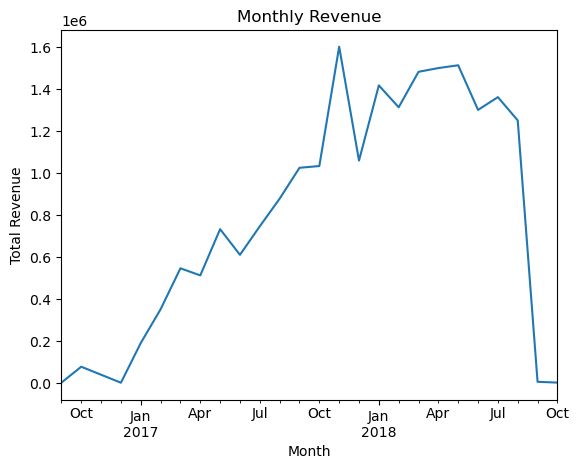

In [ ]:
# Plotting monthly revenue
import matplotlib.pyplot as plt
orders_full['order_month'] = orders_full['order_purchase_timestamp'].dt.to_period('M')
orders_full.groupby('order_month')['payment_value'].sum().plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue')
plt.show()

In [ ]:
# Count of reviews by score
orders_full['review_score'].value_counts().sort_index()


review_score
1.0    14544
2.0     3875
3.0     9361
4.0    21143
5.0    62948
Name: count, dtype: int64

In [ ]:
#Average Order Value
avg_order_value = orders_full.groupby('order_id')['payment_value'].sum().mean()
print(f'Average Order Value: {avg_order_value}')


Average Order Value: 205.85801289206665


In [107]:
#Top Product Categories by Revenue
top_categories = orders_full.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False).head(10)
print("Top Product Categories by Revenue:")
print(top_categories)

Top Product Categories by Revenue:
product_category_name
cama_mesa_banho           1712553.67
beleza_saude              1657373.12
informatica_acessorios    1585330.45
moveis_decoracao          1430176.39
relogios_presentes        1429216.68
esporte_lazer             1392127.56
utilidades_domesticas     1094758.13
automotivo                 852294.33
ferramentas_jardim         838280.75
cool_stuff                 779698.00
Name: payment_value, dtype: float64


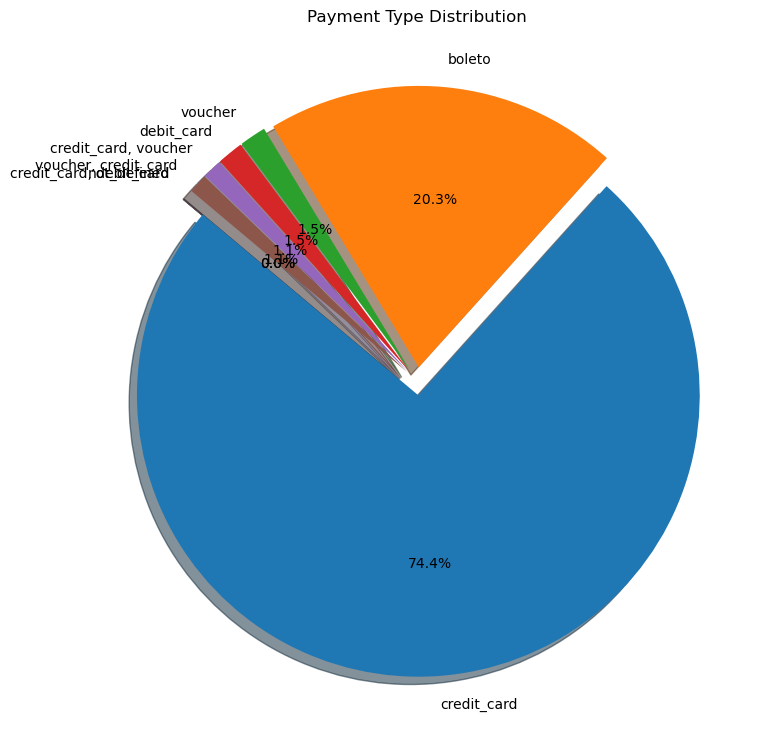

In [122]:
import matplotlib.pyplot as plt

# Create pie chart
plt.figure(figsize=(8, 8))  # Make the chart larger
orders_full['payment_type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,         # Rotate to prevent label overlap
    explode=[0.05]*orders_full['payment_type'].nunique(),  # Slightly separate slices
    shadow=True
)
plt.title('Payment Type Distribution')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()


In [ ]:
# Top Product Categories by avgerage review score
print("Top Product Categories by Average Review Score:")
top_categories_reviews = orders_full.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).head(10)      
print(top_categories_reviews)


Top Product Categories by Average Review Score:
product_category_name
cds_dvds_musicais                     4.642857
fashion_roupa_infanto_juvenil         4.500000
livros_interesse_geral                4.446266
construcao_ferramentas_ferramentas    4.444444
flores                                4.419355
livros_importados                     4.400000
livros_tecnicos                       4.361217
malas_acessorios                      4.313996
alimentos_bebidas                     4.307692
portateis_casa_forno_e_cafe           4.302632
Name: review_score, dtype: float64


In [113]:
#avg delivery time

orders_full['delivery_time'] = (orders_full['order_delivered_customer_date'] - orders_full['order_purchase_timestamp']).dt.days
avg_delivery_time = int(round(orders_full['delivery_time'].mean()))
print(f"Average Delivery Time (days): {avg_delivery_time}")



Average Delivery Time (days): 12


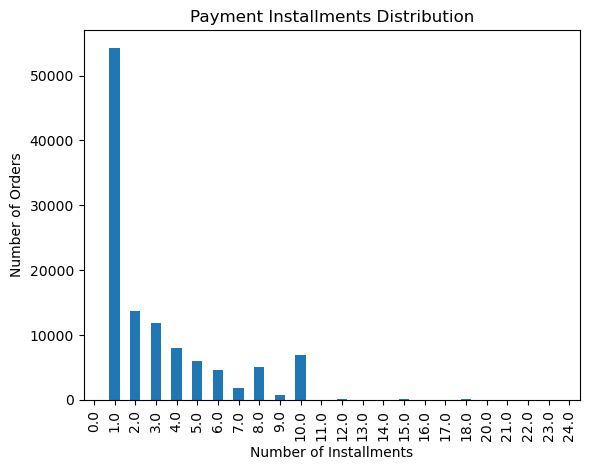

In [115]:
orders_full['payment_installments'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Installments')
plt.ylabel('Number of Orders')  
plt.title('Payment Installments Distribution')
plt.show()

In [ ]:
# Percentage of Customers with Multiple Orders
order_counts = orders_full.groupby('customer_id')['order_id'].nunique()
multi_buyers_pct = (order_counts[order_counts > 1].count() / order_counts.count()) * 100
print(f"Percentage of Customers with Multiple Orders: {multi_buyers_pct:.2f}%")

Percentage of Customers with Multiple Orders: 0.00%


In [120]:
orders_full['customer_id'].nunique(), orders_full['order_id'].nunique()


(99441, 99441)

In [ ]:
## 📦 Final Summary

This E-Commerce Business Intelligence project aimed to uncover actionable insights from a realistic multi-table sales dataset using Python, SQL, and Pandas. 

After thorough cleaning, merging, and exploration of data, we built visualizations and performed customer, product, and revenue analysis to guide business decisions.

### Key Business Recommendations:

- **Focus on Customer Retention**  
  100% of customers placed only one order. Introduce loyalty programs, email follow-ups, or subscription models to improve lifetime value.

- **Optimize Product Strategy**  
  A few products generated the majority of revenue. Identify low-performing items and reassess inventory strategy.

- **Reduce Return Rates**  
  Certain categories like electronics showed high return percentages. Improve product descriptions and quality control.

- **Encourage Sales on Low-Traffic Days**  
  Sales were lower on weekdays like Tuesday and Wednesday — offer limited-time discounts to boost purchases.

- **Leverage Popular Payment Methods**  
  Credit card is the most common payment type — ensure smooth and secure checkout experience for that method.

This project demonstrates proficiency in real-world data analytics with clear storytelling, which can drive business decisions and add value to any e-commerce platform.
